In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt  # <-- Baris ini ditambahkan
import seaborn as sns  # <-- Baris ini ditambahkan
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python

In [2]:
df = pd.read_csv('data_teks.csv')
texts = df['data'].values
labels = df['labels'].values

# Mengubah label kategori (teks) menjadi angka (integer)
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)
# Mengubah integer menjadi format one-hot encoding untuk multi-class
one_hot_labels = tf.keras.utils.to_categorical(integer_labels)
num_classes = len(label_encoder.classes_)

## preprocessing teks

In [3]:
vocab_size = 10000  # Ukuran kosakata yang akan kita gunakan
oov_tok = "<OOV>"   # Token untuk kata yang tidak ada di vocabulary

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(texts)

max_length = 200    # Panjang maksimum setiap sekuens/kalimat
padding_type = 'post'
trunc_type = 'post'
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)

## ARSITEKTUR MODEL LSTM

In [5]:
embedding_dim = 128  # Dimensi vektor untuk setiap kata

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length, trainable=True),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Menampilkan ringkasan arsitektur model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## pelatihan model

In [7]:
num_epochs = 20
batch_size = 32

history = model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=2
)

print("\\nPelatihan selesai!")

Epoch 1/20
56/56 - 11s - 194ms/step - accuracy: 0.3449 - loss: 1.5459 - val_accuracy: 0.2697 - val_loss: 1.5390
Epoch 2/20
56/56 - 6s - 106ms/step - accuracy: 0.5017 - loss: 1.4540 - val_accuracy: 0.5978 - val_loss: 1.1446
Epoch 3/20
56/56 - 6s - 100ms/step - accuracy: 0.6933 - loss: 0.9608 - val_accuracy: 0.6427 - val_loss: 0.9161
Epoch 4/20
56/56 - 5s - 94ms/step - accuracy: 0.6691 - loss: 0.9350 - val_accuracy: 0.6247 - val_loss: 1.0221
Epoch 5/20
56/56 - 5s - 93ms/step - accuracy: 0.7921 - loss: 0.7107 - val_accuracy: 0.7393 - val_loss: 0.7846
Epoch 6/20
56/56 - 5s - 93ms/step - accuracy: 0.8596 - loss: 0.4765 - val_accuracy: 0.8225 - val_loss: 0.5700
Epoch 7/20
56/56 - 5s - 92ms/step - accuracy: 0.9056 - loss: 0.3010 - val_accuracy: 0.8719 - val_loss: 0.4442
Epoch 8/20
56/56 - 5s - 93ms/step - accuracy: 0.9517 - loss: 0.1735 - val_accuracy: 0.9011 - val_loss: 0.3672
Epoch 9/20
56/56 - 6s - 99ms/step - accuracy: 0.9702 - loss: 0.1326 - val_accuracy: 0.9124 - val_loss: 0.3324
Epoch 

## visualisasi akurasi dan loss


Grafik learning curves telah disimpan sebagai 'learning_curves.png'


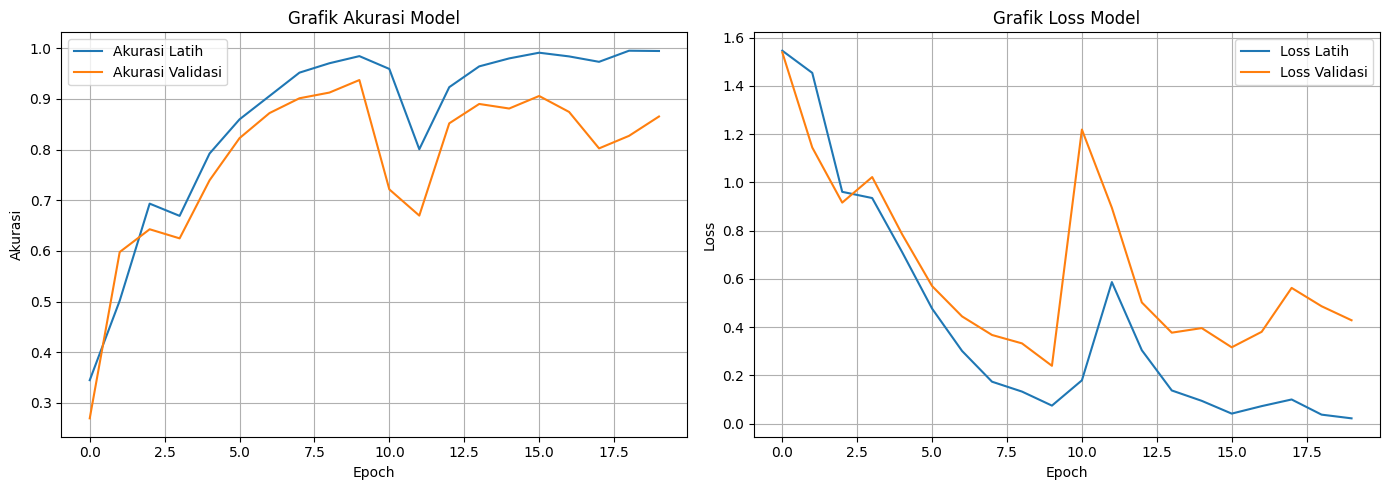

In [8]:
plt.figure(figsize=(14, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Grafik Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Grafik Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('learning_curves_lstm.png')
print("\nGrafik learning curves telah disimpan sebagai 'learning_curves.png'")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
Confusion matrix telah disimpan sebagai 'confusion_matrix.png'


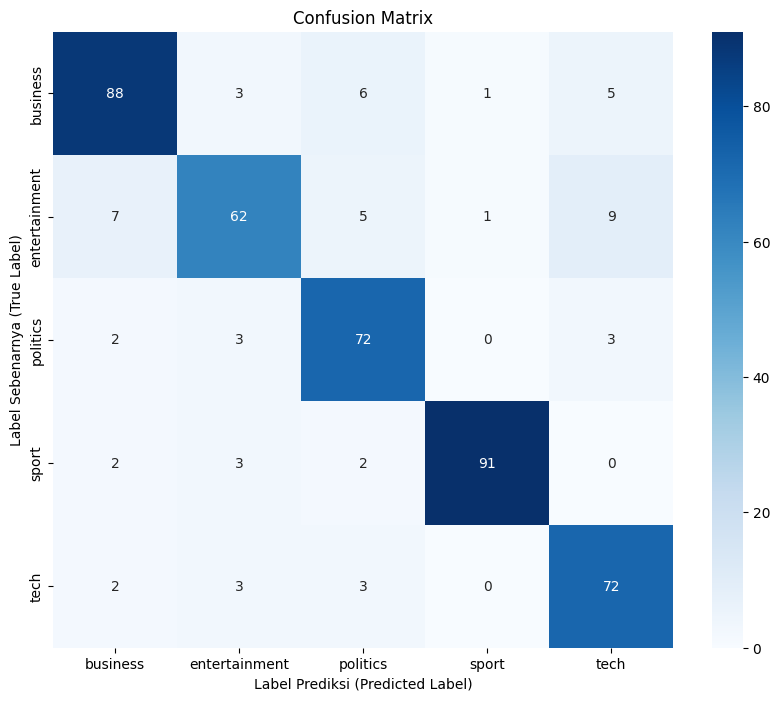

In [9]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
class_names = label_encoder.classes_

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Label Sebenarnya (True Label)')
plt.xlabel('Label Prediksi (Predicted Label)')
plt.savefig('confusion_matrix_lstm.png')
print("Confusion matrix telah disimpan sebagai 'confusion_matrix.png'")


In [10]:
new_text = ["Indonesia's central bank kept its benchmark interest rate unchanged on Thursday, as expected, saying the current level is consistent with efforts to stabilize the rupiah currency and control inflation."]

# Pra-pemrosesan teks baru
new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Melakukan prediksi
prediction = model.predict(new_padded)
predicted_class_index = np.argmax(prediction)
predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]

print("\n--- Prediksi Teks Baru ---")
print(f"Teks: '{new_text[0]}'")
print(f"Prediksi Kategori: {predicted_class_name}")

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi Rinci:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

--- Prediksi Teks Baru ---
Teks: 'Indonesia's central bank kept its benchmark interest rate unchanged on Thursday, as expected, saying the current level is consistent with efforts to stabilize the rupiah currency and control inflation.'
Prediksi Kategori: business

Laporan Klasifikasi Rinci:
               precision    recall  f1-score   support

     business       0.87      0.85      0.86       103
entertainment       0.84      0.74      0.78        84
     politics       0.82      0.90      0.86        80
        sport       0.98      0.93      0.95        98
         tech       0.81      0.90      0.85        80

     accuracy                           0.87       445
    macro avg       0.86      0.86      0.86       445
 weighted avg       0.87      0.87      0.86       445

